# Montecarlo Simulation
## Adapted from Dr. Pryzc (UT Austin)

### Objective
To create a montecarlo simulation for uncertainty modeling in a subsurface simulation. Montecarlo simulation is random sampling with replacement of a summary statistic such as the mean or standard deviation. 

### Procedure
1. Make the cumulative distribution function (CDF)
2. Draw a random value
3. Apply the inverse of the CDF for a realization (times samples with replacement)
4. Apply this over many realizations, use a transfer function to get back to the summary statistic
5. Make a model to view the uncertainty of the summary statistic

### Limitations
1. The distribution of the data is representative of the population
2. The variables are independent of each other
3. Stationarity - all realizations for each variable are from the same distribution (Gaussian)

In [1]:
import geostatspy.GSLIB as GSLIB     
import geostatspy.geostats as geostats      #geostats packages for calculation and modeling from Dr. Pyrcz

In [2]:
import numpy as np
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math                                 #standard packages to help with calculation and modeling
from scipy import interpolate

First step is to save all data to the same file location, will be storing here for now

In [3]:
os.chdir("/Users/AlexDodd/Desktop/Python Practice/Montecarlo Simulation")

Next we can do a quick example Montecarlo simulation (MCS) of an OOIP calculation

In [4]:
ex_por_mean = 0.15;ex_por_stdev=.02      #porosity mean and standard deviation
ex_vol_mu = 13.0;ex_vol_sigma=0.5        #lognormal average volume and standard deviation (mu and sigma) m^3
ex_so_min = 0.2 ;ex_so_max=0.4           #oil saturation min and max
ex_por_min=0.1;ex_por_max=0.2           #porosity min and max for plotting
ex_vol_min=0.0;ex_vol_max=4000000       #volume min and max for plotting
ex_L = 1000                           #number of realizations

Going from lognormal to normal: mean = Exp(mu + sigma^2/2)
st. dev. = mu x sqrt(EXP(sigma^2)-1). Below is the actual volume for reference:

In [5]:
ex_vol_mean = math.exp(ex_vol_mu+((ex_vol_sigma**2)/2))
ex_vol_stdev = ex_vol_mean*(math.sqrt(math.exp(ex_vol_sigma**2)-1))
print('The average volume is '+ str(round(ex_vol_mean,0))+' m\u00b3 and the standard deviation of the volume is ' 
     +str(round(ex_vol_stdev,0))+ ' m\u00b3')

The average volume is 501320.0 m³ and the standard deviation of the volume is 267174.0 m³


Using Numpy to store random samples with replacement into an array for our porosity (normal distirbution), volume (lognormal distribution), and saturation (uniform distribution):

In [6]:
ex_por = np.random.normal(ex_por_mean,ex_por_stdev,ex_L)     #creates an array of random samples over the amount of realizations
ex_vol = np.random.lognormal(ex_vol_mu,ex_vol_sigma,ex_L)    #same as above but for a lognormal dist
ex_so = np.random.uniform(ex_so_min,ex_so_max,ex_L)          #same as above but for a uniform dist

In [64]:
GSLIB.hist_st

array([ 732036.91332147, 1173543.67415313,  333790.58440473, ...,
        678455.83870194,  628019.26810947,  382579.96131072])

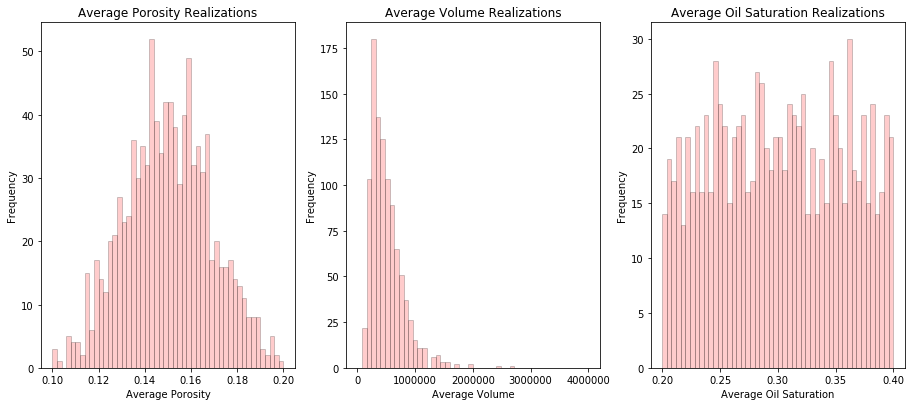

In [8]:
plt.subplot(131)
GSLIB.hist_st(ex_por,ex_por_min,ex_por_max,log=False,cumul=False,bins=50,weights=None,xlabel='Average Porosity',title='Average Porosity Realizations')

plt.subplot(132)
GSLIB.hist_st(ex_vol,ex_vol_min,ex_vol_max,log=False,cumul=False,bins=50,weights=None,xlabel='Average Volume',title='Average Volume Realizations')

plt.subplot(133)
GSLIB.hist_st(ex_so,ex_so_min,ex_so_max,log=False,cumul=False,bins=50,weights=None,xlabel='Average Oil Saturation',title='Average Oil Saturation Realizations')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)

These distirbutions make sense based off of the distirbutions chosen to create random samples with replacement which were Gaussian, lognormal, and uniform

Now to take these distirbutions and calculate OOIP

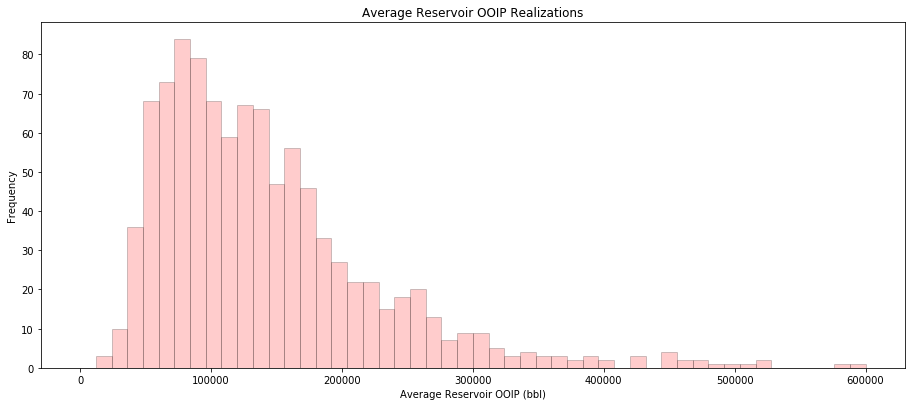

In [9]:
OOIP = ex_por*ex_vol*ex_so*6.29     #6.29 bbl/m^3
plt.subplot(111)
GSLIB.hist_st(OOIP,0,600000,log=False,cumul=False,bins=50,weights=None,xlabel='Average Reservoir OOIP (bbl)',title='Average Reservoir OOIP Realizations')

plt.subplots_adjust(left=0,bottom=0,right=2,top=1.2,wspace=0.2,hspace=0.2)

Ok, so now we have the different OOIP realizations which provides the uncertainty in the calculated statistic (OOIP) with varying amounts of data for the components that go into calculating OOIP (Porosity, Saturation, and Volume). Next we will increase the amoint of realizations to show the decrease in the uncertainty in OOIP

In [10]:
ex_L1=100
ex_por = np.random.normal(ex_por_mean,ex_por_stdev,ex_L1)     #creates an array of random samples over the amount of realizations
ex_vol = np.random.lognormal(ex_vol_mu,ex_vol_sigma,ex_L1)    #same as above but for a lognormal dist
ex_so = np.random.uniform(ex_so_min,ex_so_max,ex_L1)          #same as above but for a uniform dist
OOIP1 = ex_por*ex_vol*ex_so*6.29    #6.29 bbl/m^3

ex_L2=10000
ex_por = np.random.normal(ex_por_mean,ex_por_stdev,ex_L2)     #creates an array of random samples over the amount of realizations
ex_vol = np.random.lognormal(ex_vol_mu,ex_vol_sigma,ex_L2)    #same as above but for a lognormal dist
ex_so = np.random.uniform(ex_so_min,ex_so_max,ex_L2)          #same as above but for a uniform dist
OOIP2 = ex_por*ex_vol*ex_so*6.29     #6.29 bbl/m^3

ex_L3=1000000
ex_por = np.random.normal(ex_por_mean,ex_por_stdev,ex_L3)     #creates an array of random samples over the amount of realizations
ex_vol = np.random.lognormal(ex_vol_mu,ex_vol_sigma,ex_L3)    #same as above but for a lognormal dist
ex_so = np.random.uniform(ex_so_min,ex_so_max,ex_L3)          #same as above but for a uniform dist
OOIP3 = ex_por*ex_vol*ex_so*6.29     #6.29 bbl/m^3


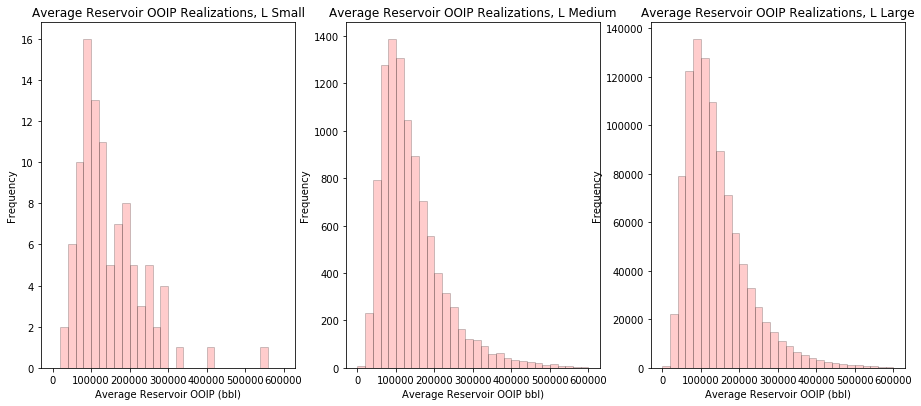

In [11]:
plt.subplot(131)
GSLIB.hist_st(OOIP1,0,600000,log=False,cumul=False,bins=30,weights=None,xlabel='Average Reservoir OOIP (bbl)',title='Average Reservoir OOIP Realizations, L Small')

plt.subplot(132)
GSLIB.hist_st(OOIP2,0,600000,log=False,cumul=False,bins=30,weights=None,xlabel='Average Reservoir OOIP bbl)',title='Average Reservoir OOIP Realizations, L Medium')

plt.subplot(133)
GSLIB.hist_st(OOIP3,0,600000,log=False,cumul=False,bins=30,weights=None,xlabel='Average Reservoir OOIP (bbl)',title='Average Reservoir OOIP Realizations, L Large')


plt.subplots_adjust(left=0,bottom=0,right=2,top=1.2,wspace=0.2,hspace=0.2)


As you can see the uncertainty in OOIP decreases as you increase the number of realizations which is to be expected, but increasing the number of realizations will lenghten the time to calculate as the number of samples increases as well.

Now I am going to attempt to replicate this to a sample excel file to take log data to OOIP caluclation

In [12]:
df = pd.read_excel('Example_Log_Data.xlsx')
df.head()

,Depth,Porosity,Resistivity
0,5000,0.24,799
1,5006,0.15,765
2,5008,0.15,787
3,5013,0.16,711
4,5015,0.21,732


The above file just includes depths and random porosity and resitivity values, using some basic constants for area and archie paramters and water restivity., We will caluclate Oil saturation

In [13]:
a=1.0;m=2.0;n=2.0           #Archie parameters
Rw=15                     #Water Restivity in ohm.m
Sw=((a/(df['Porosity'])**m)*((Rw/df['Resistivity'])))**(1/n)
So=1.0-Sw
df['Water Saturation']=Sw     #adding the saturations to the excel file
df['Oil Saturation']=So
df.describe().transpose()     #quick look at the summary statistics

,count,mean,std,min,25%,50%,75%,max
Depth,178.0,5514.612360,298.510883,5000.000000,5271.500000,5512.000000,5761.750000,6027.000000
Porosity,178.0,0.206629,0.030971,0.150000,0.180000,0.210000,0.230000,0.250000
Resistivity,178.0,752.134831,29.778349,700.000000,726.000000,754.000000,779.000000,800.000000
Water Saturation,178.0,0.700600,0.114195,0.548065,0.605659,0.677974,0.769247,0.975204
Oil Saturation,178.0,0.299400,0.114195,0.024796,0.230753,0.322026,0.394341,0.451935


The next information for an OOIP calculation is the volume of our reservoir below are the steps using the depth intervals weighted by oil saturation and contoured by assuming a 1 acre area (1 well). Using a contour function, we can ascertain the rock volume. 

In [25]:
area = 43560     #ft^2     
Depth=df['Depth'].values
h=np.diff(Depth)     #calculates the difference between each depth interval to get the height
vol=area*h           #volume = height interval times height
avg_vol=np.average(vol)    #taking the average volume
np.array(vol)
vol2=np.append(vol,avg_vol)  #adding the average volume to the end of the list to match data set length
df['Volume']=vol2
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Depth,178.0,5514.612360,298.510883,5000.000000,5271.500000,5512.000000,5761.750000,6027.000000
Porosity,178.0,0.206629,0.030971,0.150000,0.180000,0.210000,0.230000,0.250000
Resistivity,178.0,752.134831,29.778349,700.000000,726.000000,754.000000,779.000000,800.000000
Water Saturation,178.0,0.700600,0.114195,0.548065,0.605659,0.677974,0.769247,0.975204
Oil Saturation,178.0,0.299400,0.114195,0.024796,0.230753,0.322026,0.394341,0.451935
Volume,178.0,252746.440678,123557.267060,43560.000000,174240.000000,261360.000000,348480.000000,435600.000000


Now to create random samples of the porosity, volume, and saturations to calculate OOIP

In [67]:
vol3=df['Volume']
#ex_vol_mean = math.exp(ex_vol_mu+((ex_vol_sigma**2)/2))
#ex_vol_stdev = ex_vol_mean*(math.sqrt(math.exp(ex_vol_sigma**2)-1))

vol_sigma=math.sqrt((math.log(((np.std(vol3)/np.mean(vol3))+1)**2)))
vol_mu=(math.log(np.mean(vol3)))-((vol_sigma**2)/2)

In [68]:
L=10000
por=np.random.normal(np.mean(poro),np.std(poro),L)
volume=np.random.lognormal(vol_mu,vol_sigma,L)
oil_sat=np.random.uniform(np.min(df['Oil Saturation']),np.max(df['Oil Saturation']),L)
volume

array([ 46646.97616202,  72138.32470588, 510675.20773713, ...,
        70648.9974449 ,  64341.47421395, 327297.81207457])

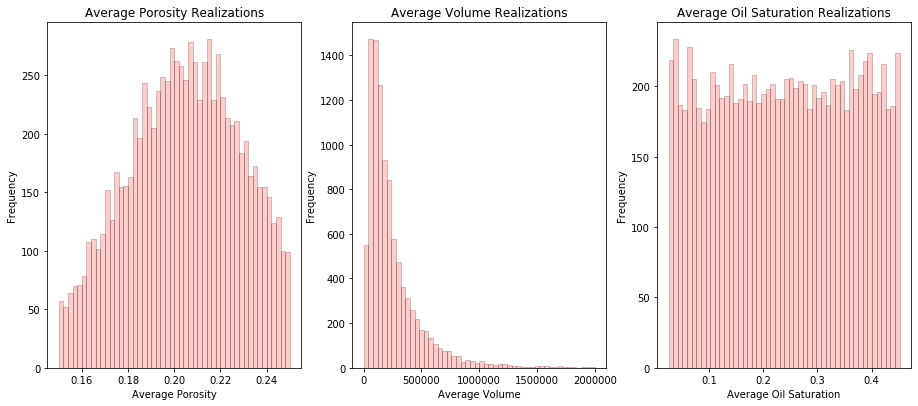

In [73]:
plt.subplot(131)
GSLIB.hist_st(por,np.min(poro),np.max(poro),log=False,cumul=False,bins=50,weights=None,xlabel='Average Porosity',title='Average Porosity Realizations')

plt.subplot(132)
GSLIB.hist_st(volume,0,2000000,log=False,cumul=False,bins=50,weights=None,xlabel='Average Volume',title='Average Volume Realizations')

plt.subplot(133)
GSLIB.hist_st(oil_sat,np.min(df['Oil Saturation']),np.max(df['Oil Saturation']),log=False,cumul=False,bins=50,weights=None,xlabel='Average Oil Saturation',title='Average Oil Saturation Realizations')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)